In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import the trainingset
data = pd.read_csv('letter-recognition.csv',header=None)  
data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [2]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [3]:
# data preprocessing for H, K
data = pd.read_csv('letter-recognition.csv',header=None) 
# pair H and K
data_H = data[data[0] == 'H']
data_K = data[data[0] == 'K']
data1 = pd.concat([data_H, data_K], axis=0)
data1.loc[data1[0] == 'H', 0] = 0
data1.loc[data1[0] == 'K', 0] = 1 


X_hk = data1[data1.columns[1:]]
X_hk.reset_index(drop=True, inplace=True)
y_hk = data1[0]
y_hk.reset_index(drop=True, inplace=True)
y_hk=y_hk.astype('int')

X_train_hk,X_test_hk, y_train_hk, y_test_hk = train_test_split(X_hk,y_hk,test_size=0.1, random_state=90)

max score：0.9464150943396227 number of subtree for max score：13


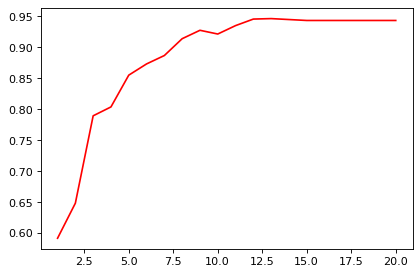

0.871264367816092


In [6]:
# Model fitting for H,K classification 
test = []
for i in range(20):
    clf = tree.DecisionTreeClassifier(criterion="entropy"
                                      ,random_state=90
                                      ,splitter="random"
                                      ,max_depth=i+1
                                     )
    clf.fit(X_train_hk,y_train_hk)
    score = cross_val_score(clf, X_train_hk, y_train_hk, cv=5).mean()
    test.append(score);
score_max = max(test)
print('max score：{}'.format(score_max),
      'number of subtree for max score：{}'.format(test.index(score_max) + 1))
plt.figure(dpi=80)
plt.plot(range(1,21),test,'-r')
plt.show();
score = cross_val_score(clf, X_test_hk, y_test_hk, cv=5).mean()
print(score)  

max score：0.9147169811320754 number of subtree for max score：18


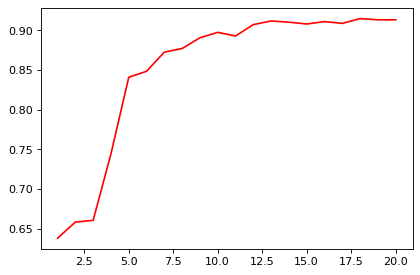

0.892183908045977


In [7]:
# Model fitting for H,K classification with embedded Methods
import pandas as pd
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score

clf = tree.DecisionTreeClassifier(criterion="entropy"
                                      ,random_state=90
                                      ,splitter="random"
                                     )

X_embedded_hk = SelectFromModel(clf, threshold = -np.inf, max_features = 4).fit_transform(X_hk, y_hk)
X_embedded_train_hk,X_embedded_test_hk, y_embedded_train_hk, y_embedded_test_hk = train_test_split(X_embedded_hk,y_hk,test_size=0.1,
                                                                                                   random_state=90)
test = []
for i in range(20):
    clf = tree.DecisionTreeClassifier(criterion="entropy"
                                      ,random_state=90
                                      ,splitter="random"
                                      ,max_depth=i+1
                                     )
    clf.fit(X_embedded_train_hk,y_embedded_train_hk)
    score = cross_val_score(clf, X_embedded_train_hk, y_embedded_train_hk, cv=5).mean()
    test.append(score);
score_max = max(test)
print('max score：{}'.format(score_max),
      'number of subtree for max score：{}'.format(test.index(score_max) + 1))
plt.figure(dpi=80)
plt.plot(range(1,21),test,'-r')
plt.show();
score = cross_val_score(clf, X_embedded_test_hk, y_embedded_test_hk, cv=5).mean()
print(score)  

In [8]:
# data preprocessing for M, Y
data = pd.read_csv('letter-recognition.csv',header=None) 
# pair M and Y
data_M = data[data[0] == 'M']
data_Y = data[data[0] == 'Y']
data1 = pd.concat([data_M, data_Y], axis=0)
data1.loc[data1[0] == 'M', 0] = 0
data1.loc[data1[0] == 'Y', 0] = 1 


X_my = data1[data1.columns[1:]]
X_my.reset_index(drop=True, inplace=True)
y_my = data1[0]
y_my.reset_index(drop=True, inplace=True)
y_my=y_my.astype('int')

X_train_my,X_test_my, y_train_my, y_test_my = train_test_split(X_my,y_my,test_size=0.1, random_state=90)

max score：0.9852112676056338 number of subtree for max score：8


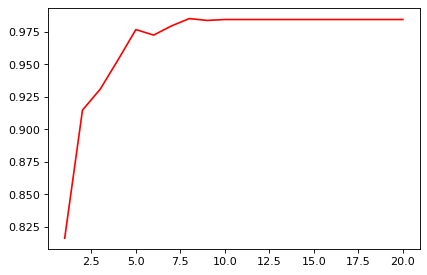

0.9556451612903226


In [9]:
# Model fitting for M,Y classification
test = []
for i in range(20):
    clf = tree.DecisionTreeClassifier(criterion="entropy"
                                      ,random_state=90
                                      ,splitter="random"
                                      ,max_depth=i+1
                                     )
    clf.fit(X_train_my,y_train_my)
    score = cross_val_score(clf, X_train_my, y_train_my, cv=5).mean()
    test.append(score);
score_max = max(test)
print('max score：{}'.format(score_max),
      'number of subtree for max score：{}'.format(test.index(score_max) + 1))
plt.figure(dpi=80)
plt.plot(range(1,21),test,'-r')
plt.show();
score = cross_val_score(clf, X_test_my, y_test_my, cv=5).mean()
print(score) 

max score：0.9845070422535211 number of subtree for max score：8


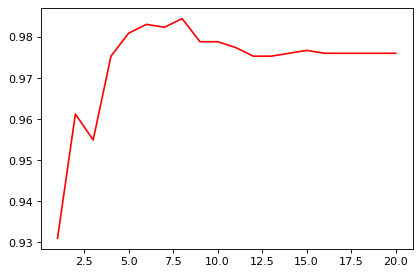

0.942741935483871


In [10]:
# Model fitting for M,Y classification with embedded Methods
import pandas as pd
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score

clf = tree.DecisionTreeClassifier(criterion="entropy"
                                      ,random_state=90
                                      ,splitter="random"
                                     )

X_embedded_my = SelectFromModel(clf, threshold = -np.inf, max_features = 4).fit_transform(X_my, y_my)
X_embedded_train_my,X_embedded_test_my, y_embedded_train_my, y_embedded_test_my = train_test_split(X_embedded_my,y_my,test_size=0.1,
                                                                                                   random_state=90)
test = []
for i in range(20):
    clf = tree.DecisionTreeClassifier(criterion="entropy"
                                      ,random_state=90
                                      ,splitter="random"
                                      ,max_depth=i+1
                                     )
    clf.fit(X_embedded_train_my,y_embedded_train_my)
    score = cross_val_score(clf, X_embedded_train_my, y_embedded_train_my, cv=5).mean()
    test.append(score);
score_max = max(test)
print('max score：{}'.format(score_max),
      'number of subtree for max score：{}'.format(test.index(score_max) + 1))
plt.figure(dpi=80)
plt.plot(range(1,21),test,'-r')
plt.show();
score = cross_val_score(clf, X_embedded_test_my, y_embedded_test_my, cv=5).mean()
print(score)  

In [11]:
# data preprocessing for E, F
data = pd.read_csv('letter-recognition.csv',header=None) 
# pair E and F
data_E = data[data[0] == 'E']
data_F = data[data[0] == 'F']
data1 = pd.concat([data_E, data_F], axis=0)
data1.loc[data1[0] == 'E', 0] = 0
data1.loc[data1[0] == 'F', 0] = 1 

X_ef = data1[data1.columns[1:]]
X_ef.reset_index(drop=True, inplace=True)
y_ef = data1[0]
y_ef.reset_index(drop=True, inplace=True)
y_ef=y_ef.astype('int')

X_train_ef,X_test_ef, y_train_ef, y_test_ef = train_test_split(X_ef,y_ef,test_size=0.1, random_state=90)

max score：0.986307560449835 number of subtree for max score：9


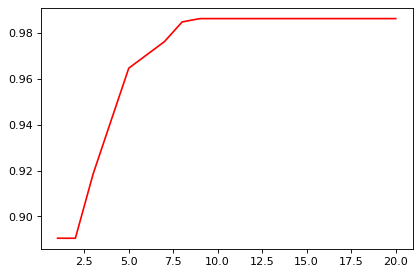

0.896774193548387


In [12]:
# Model fitting for E,F classification
test = []
for i in range(20):
    clf = tree.DecisionTreeClassifier(criterion="entropy"
                                      ,random_state=90
                                      ,splitter="random"
                                      ,max_depth=i+1
                                     )
    clf.fit(X_train_ef,y_train_ef)
    score = cross_val_score(clf, X_train_ef, y_train_ef, cv=5).mean()
    test.append(score);
score_max = max(test)
print('max score：{}'.format(score_max),
      'number of subtree for max score：{}'.format(test.index(score_max) + 1))
plt.figure(dpi=80)
plt.plot(range(1,21),test,'-r')
plt.show();
score = cross_val_score(clf, X_test_ef, y_test_ef, cv=5).mean()
print(score) 

max score：0.9776718697244371 number of subtree for max score：10


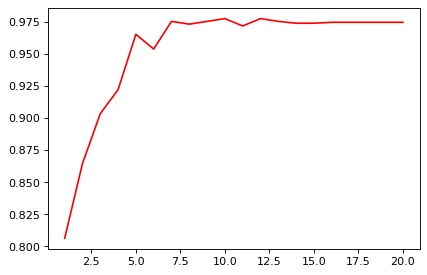

0.935483870967742


In [13]:
# Model fitting for E,F classification with embedded Methods
import pandas as pd
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score

clf = tree.DecisionTreeClassifier(criterion="entropy"
                                      ,random_state=90
                                      ,splitter="random"
                                     )

X_embedded_ef = SelectFromModel(clf, threshold = -np.inf, max_features = 4).fit_transform(X_ef, y_ef)
X_embedded_train_ef,X_embedded_test_ef, y_embedded_train_ef, y_embedded_test_ef = train_test_split(X_embedded_ef,y_ef,test_size=0.1,
                                                                                                   random_state=90)
test = []
for i in range(20):
    clf = tree.DecisionTreeClassifier(criterion="entropy"
                                      ,random_state=90
                                      ,splitter="random"
                                      ,max_depth=i+1
                                     )
    clf.fit(X_embedded_train_ef,y_embedded_train_ef)
    score = cross_val_score(clf, X_embedded_train_ef, y_embedded_train_ef, cv=5).mean()
    test.append(score);
score_max = max(test)
print('max score：{}'.format(score_max),
      'number of subtree for max score：{}'.format(test.index(score_max) + 1))
plt.figure(dpi=80)
plt.plot(range(1,21),test,'-r')
plt.show();
score = cross_val_score(clf, X_embedded_test_ef, y_embedded_test_ef, cv=5).mean()
print(score)  

In [14]:
#   data preprocessing for mulit
data = pd.read_csv('letter-recognition.csv',header=None) 
data
for i in range(20000):
    data.iloc[i, 0] = ord(data.iloc[i, 0]) - ord('A');
    
X_multi = data[data.columns[1:]]
X_multi.reset_index(drop=True, inplace=True)
y_multi = data[0]
y_multi.reset_index(drop=True, inplace=True)
y_multi =y_multi.astype('int')

X_train_multi,X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi,y_multi,test_size=0.1, random_state=90)

max score：0.8563888888888889 number of subtree for max score：23


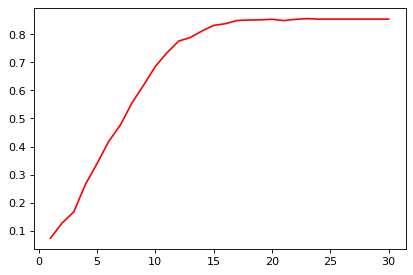

0.659


In [16]:
# Model fitting for mulit classification
test = []
for i in range(30):
    clf = tree.DecisionTreeClassifier(criterion="entropy"
                                      ,random_state=90
                                      ,splitter="random"
                                      ,max_depth=i+1
                                     )
    clf.fit(X_train_multi,y_train_multi)
    score = cross_val_score(clf, X_train_multi, y_train_multi, cv=5).mean()
    test.append(score);
score_max = max(test)
print('max score：{}'.format(score_max),
      'number of subtree for max score：{}'.format(test.index(score_max) + 1))
plt.figure(dpi=80)
plt.plot(range(1,31),test,'-r')
plt.show();
score = cross_val_score(clf, X_test_multi, y_test_multi, cv=5).mean()
print(score) 

max score：0.6827777777777777 number of subtree for max score：17


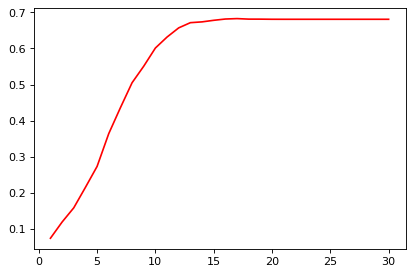

0.5855


In [17]:
# Model fitting for mulit classification with embedded Methods
import pandas as pd
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score

clf = tree.DecisionTreeClassifier(criterion="entropy"
                                      ,random_state=90
                                      ,splitter="random"
                                     )

X_embedded_multi = SelectFromModel(clf, threshold = -np.inf, max_features = 4).fit_transform(X_multi, y_multi)
X_embedded_train_multi,X_embedded_test_multi, y_embedded_train_multi, y_embedded_test_multi = train_test_split(X_embedded_multi,y_multi,
                                                                                                               test_size=0.1,
                                                                                                   random_state=90)
test = []
for i in range(30):
    clf = tree.DecisionTreeClassifier(criterion="entropy"
                                      ,random_state=90
                                      ,splitter="random"
                                      ,max_depth=i+1
                                     )
    clf.fit(X_embedded_train_multi,y_embedded_train_multi)
    score = cross_val_score(clf, X_embedded_train_multi, y_embedded_train_multi, cv=5).mean()
    test.append(score);
score_max = max(test)
print('max score：{}'.format(score_max),
      'number of subtree for max score：{}'.format(test.index(score_max) + 1))
plt.figure(dpi=80)
plt.plot(range(1,31),test,'-r')
plt.show();
score = cross_val_score(clf, X_embedded_test_multi, y_embedded_test_multi, cv=5).mean()
print(score)  